In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
data = np.load("/Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/train/train_feature.npz")

In [4]:
data.files

['features', 'label']

In [5]:
path = tf.keras.utils.get_file('train_feature.npz', 'file:///Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/train/train_feature.npz')
with np.load(path) as data:
  train_examples = data['features']
  train_labels = data['label']

In [6]:
path = tf.keras.utils.get_file('valid_feature.npz', 'file:///Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/valid/valid_feature.npz')
with np.load(path) as data:
  valid_examples = data['features']
  valid_labels = data['label']

In [7]:
path = tf.keras.utils.get_file('test_feature.npz', 'file:///Users/trijalsrivastava/Code/ML/CS771/mini-project-1 2/datasets/test/test_feature.npz')
with np.load(path) as data:
  test_examples = data['features']

In [8]:
print(train_examples.shape, train_labels.shape)
print(valid_examples.shape, valid_labels.shape)

train_examples = np.asarray(train_examples, dtype=np.float32)
train_labels = np.asarray(train_labels, dtype=np.int32)
valid_examples = np.asarray(valid_examples, dtype=np.float32)
valid_labels = np.asarray(valid_labels, dtype=np.int32)
test_examples = np.asarray(test_examples, dtype=np.float32)

# train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((valid_examples, valid_labels))


(7080, 13, 768) (7080,)
(489, 13, 768) (489,)


In [9]:
# Flatten the input (since models like RandomForest expect 2D input)
train_examples_flat = train_examples.reshape(train_examples.shape[0], -1)
valid_examples_flat = valid_examples.reshape(valid_examples.shape[0], -1)
test_examples_flat = test_examples.reshape(test_examples.shape[0], -1)

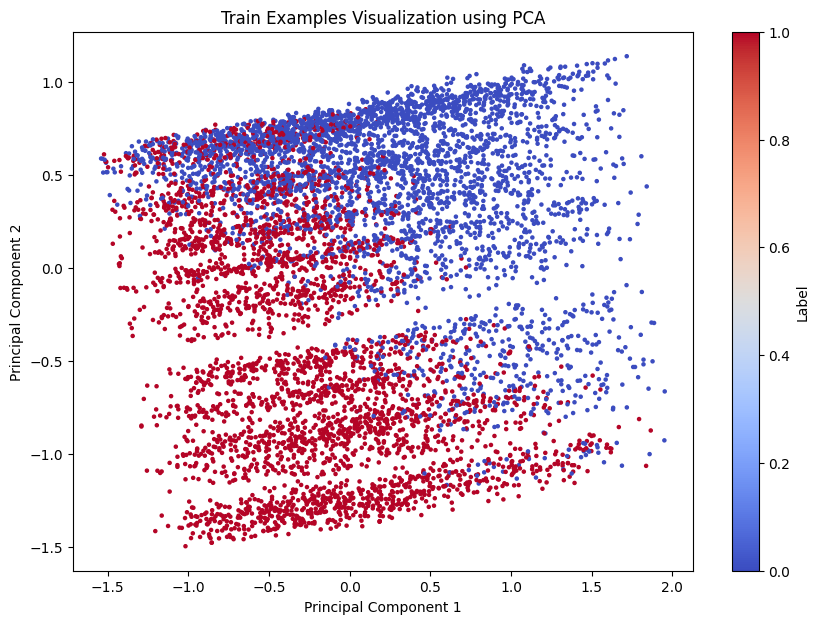

In [10]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Flatten the input if not already flattened
train_examples_flat = train_examples.reshape(train_examples.shape[0], -1)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_examples_flat)

# Plot the PCA result
plt.figure(figsize=(10, 7))
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=train_labels, cmap='coolwarm', s=5)
plt.title('Train Examples Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

Max value in the dataset: 0.86884605884552
Min value in the dataset: -0.9346155524253845


## Using basic RF classifier and 100% dataset 

In [19]:
# Apply PCA to train_examples_flat
pca = PCA(n_components=7000)
train_pca = pca.fit_transform(train_examples_flat)

# Fit the RandomForestClassifier with the PCA-transformed data
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(train_pca, train_labels)
y_pred = clf.predict(pca.transform(valid_examples_flat))
print("Accuracy:", accuracy_score(valid_labels, y_pred))


Accuracy: 0.8098159509202454


In [11]:
# Access the first decision tree in the forest
tree_1 = clf.estimators_[0]


In [12]:
tree_1

DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

## Using partial dataset now 80% then 70% then 60% then 50%

In [35]:
from sklearn.model_selection import train_test_split

train_examples_80, train_examples_20, train_labels_80, train_labels_20 = train_test_split( train_examples_flat, train_labels, test_size=0.2, random_state=42)
train_examples_70, train_examples_30, train_labels_70, train_labels_30 = train_test_split( train_examples_flat, train_labels, test_size=0.3, random_state=42)
train_examples_60, train_examples_40, train_labels_60, train_labels_40 = train_test_split( train_examples_flat, train_labels, test_size=0.4, random_state=42)
train_examples_50, train_examples_50, train_labels_50, train_labels_50 = train_test_split( train_examples_flat, train_labels, test_size=0.5, random_state=42)

In [36]:
clf = RandomForestClassifier(n_estimators=200, random_state=0)
clf.fit(train_examples_flat, train_labels)
y_pred = clf.predict(valid_examples_flat)
print("Accuracy with 100%:", accuracy_score(valid_labels, y_pred))

Accuracy with 100%: 0.9897750511247444


In [37]:

clf_1 = RandomForestClassifier(n_estimators=200, random_state=0)
clf_1.fit(train_examples_80, train_labels_80)
y_pred = clf_1.predict(valid_examples_flat)
print("Accuracy with 80%:", accuracy_score(valid_labels, y_pred))


Accuracy with 80%: 0.9856850715746421


In [38]:
clf_2 = RandomForestClassifier(n_estimators=200, random_state=0)
clf_2.fit(train_examples_60, train_labels_60)
y_pred = clf_2.predict(valid_examples_flat)
print("Accuracy with 60%:", accuracy_score(valid_labels, y_pred))


Accuracy with 60%: 0.9795501022494888


In [39]:
clf_3 = RandomForestClassifier(n_estimators=200,  random_state=0)
clf_3.fit(train_examples_40, train_labels_40)
y_pred = clf_3.predict(valid_examples_flat)
print("Accuracy with 40%:", accuracy_score(valid_labels, y_pred))

Accuracy with 40%: 0.9693251533742331


In [40]:
clf_4 = RandomForestClassifier(n_estimators=200, random_state=0)
clf_4.fit(train_examples_20, train_labels_20)
y_pred = clf_4.predict(valid_examples_flat)
print("Accuracy with 20%:", accuracy_score(valid_labels, y_pred))

Accuracy with 20%: 0.9550102249488752


In [41]:
y_test_pred = clf.predict(test_examples_flat)
df_test_pred = pd.DataFrame(y_test_pred, columns=['Predicted'])
df_test_pred.to_csv('test_predictions_2.csv', index=False)

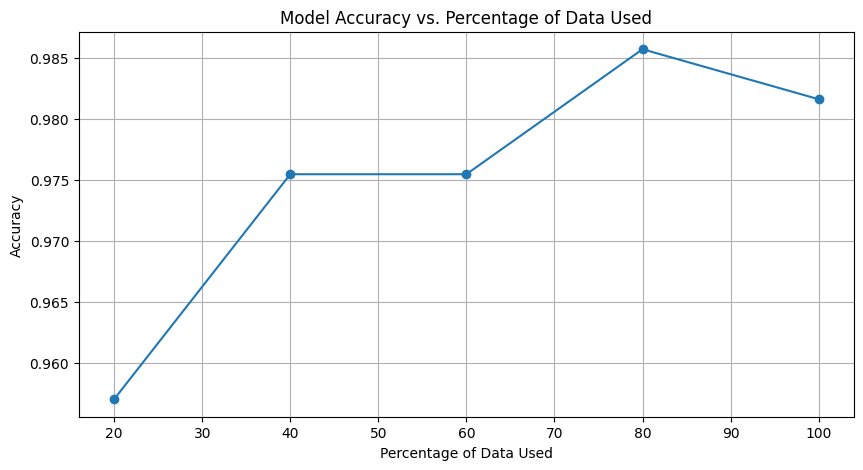

In [23]:
import matplotlib.pyplot as plt

# Percentages of data used
percentages = [100, 80, 60, 40, 20]

# Accuracies corresponding to the percentages 
accuracies = [
    accuracy_score(valid_labels, clf.predict(valid_examples_flat)),
    accuracy_score(valid_labels, clf_1.predict(valid_examples_flat)),
    accuracy_score(valid_labels, clf_2.predict(valid_examples_flat)),
    accuracy_score(valid_labels, clf_3.predict(valid_examples_flat)),
    accuracy_score(valid_labels, clf_4.predict(valid_examples_flat))
]

# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.plot(percentages, accuracies, marker='o')
plt.title('Model Accuracy vs. Percentage of Data Used')
plt.xlabel('Percentage of Data Used')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(train_examples_flat)
valid_pca = pca.fit_transform(valid_examples_flat)

# tsne = TSNE(n_components=2)
# tsne_result = tsne.fit_transform(train_examples_flat)

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_labels, cmap='coolwarm', s=5, label='Train')
#plt.scatter(valid_pca[:, 0], valid_pca[:, 1], c=valid_labels, cmap='viridis', s=5, label='Valid')
plt.title('Data Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


NameError: name 'train_examples_flat' is not defined

In [31]:
from sklearn.svm import SVC
 
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = train_examples_flat
valid_pca = valid_examples_flat
print(pca_result.shape)

# X_train, X_test, y_train, y_test = train_test_split(pca_result, train_labels, test_size=0.3, random_state=42)
svm_classifier = SVC(kernel='rbf')  # Using a linear kernel for simplicity
svm_classifier.fit(pca_result, train_labels)
y_pred = svm_classifier.predict(valid_pca)
accuracy = accuracy_score(valid_labels, y_pred)
print(f"SVM Accuracy on Test Data: {accuracy * 100:.2f}%")


# h = .02  # Step size in the mesh
# x_min, x_max = pca_result[:, 0].min() - 1, pca_result[:, 0].max() + 1
# y_min, y_max = pca_result[:, 1].min() - 1, pca_result[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Plot decision boundary by predicting for each point in the mesh
# Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Step 7: Plot the PCA components and the decision boundary
# plt.figure(figsize=(10, 7))
# plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)  # Plot decision boundary
# # plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_labels, cmap='coolwarm', edgecolors='k', s=20)  # Plot data points
# plt.scatter(valid_pca[:, 0], valid_pca[:, 1], c=valid_labels, cmap='coolwarm', s=5, label='Valid')
# plt.title('SVM Decision Boundary with PCA-reduced Data')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()


(7080, 9984)
SVM Accuracy on Test Data: 97.34%


In [26]:
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout

input_shape = (13, 768)

model = Sequential()
model.add(Conv1D(filters=4, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(GlobalMaxPooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_examples, train_labels, epochs=5, batch_size=32, validation_data=(valid_examples, valid_labels))

y_pred = model.predict(valid_examples)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(valid_labels, y_pred)
print(f"Accuracy on Validation Data: {accuracy * 100:.2f}%")



/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 11, 4)          │         9,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ (None, 4)              │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,317 (36.39 KB)

 Trainable params: 9,317 (36.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.5962 - loss: 0.6549 - val_accuracy: 0.8262 - val_loss: 0.4522
Epoch 2/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.7993 - loss: 0.4594 - val_accuracy: 0.8875 - val_loss: 0.3154
Epoch 3/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.8747 - loss: 0.3411 - val_accuracy: 0.9039 - val_loss: 0.2501
Epoch 4/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.9011 - loss: 0.2730 - val_accuracy: 0.9346 - val_loss: 0.2103
Epoch 5/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.9168 - loss: 0.2580 - val_accuracy: 0.9284 - val_loss: 0.1920
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy on Validation Data: 92.84%


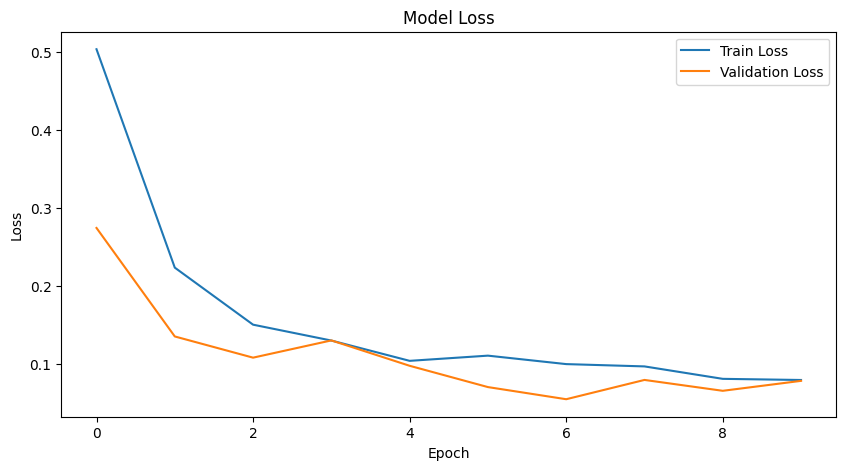

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()